In [67]:
import uproot
import uproot_methods
import awkward
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats
from awkward import JaggedArray

# Intro to ATLAS Data Second Notebook
Jeff Jiang

1840801

In this part of the assignment, we start with a description of what Lorentz 4 vectors are. Continue with a description of invariant mass - in particular, and give the reason why calculate invariant mass is useful. 

Next, we do the invariant mass calculation for sample data and actual data of the Z boson mass. Put all the calculated mass in histogram. 

Lorentz four-vector is an object with four components, which transform in a specific way under Lorentz transformation. For space-time coordinates and the energy/momentum of a particle are often expressed in four-vector form. They are defined so that the length of a four-vector is invariant under a coordinate transformation. This invariance is associated with physical ideas. The invariance of the space-time four-vector is associated with the fact that the speed of light is constant. The invariance of the energy-momentum four-vector is associated with the fact that the rest mass of a particle is invariant under coordinate transformations.

The invariant mass, in particular, is a characteristic of the system's total energy and momentum that is the same in all frames of reference related by Lorentz transformations.If a particle has energy E and momentum p, its invariant mass is given by $ m = \frac{1}{c^2} \sqrt{E^2−p^2c^2} $, where c is the speed of light.

It is important to calculate invariant mass because if we have a heavy particle A decays to two very lightweight particles B and C, the invariant mass of particles B and C equals the mass of particle A. We can find the mass of particle A just by knowing energy of B and C. 


Below is the equation for finding the invariant mass with given panda data frame.

In [68]:
def Find_IM(trees):   
    trees1 = trees[trees['lep_n'] == 2]    # only keep the data with number of leptons equal 2
    treesA,treesB =trees1.iloc[::2],trees1.iloc[1::2]    # split the data to two data frame
    treesA2,treesB2 = Check_lep_charge(treesA,treesB)    # use equation to check the leptons charge
    treesA3,treesB3 = Check_lep_type(treesA2,treesB2)    # use equation to check the leptons type
    treesA4 = treesA3.drop(columns = ['lep_n','lep_charge','lep_type','TF_charge','type_equ']).to_numpy()
    treesB4 = treesB3.drop(columns = ['lep_n','lep_charge','lep_type','TF_charge','type_equ']).to_numpy()
    IM = np.zeros(len(treesA4))
    for i in range(len(treesA4)):   # for loop for caculating the invariant mass which is the as the mass if Z boson
        lead = uproot_methods.TLorentzVector.from_ptetaphie(treesA4[i,0]/1000,treesA4[i,1],treesA4[i,2],treesA4[i,3]/1000)
        tail = uproot_methods.TLorentzVector.from_ptetaphie(treesB4[i,0]/1000,treesB4[i,1],treesB4[i,2],treesB4[i,3]/1000)
        inv_mass = lead + tail
        IM[i]=inv_mass.mag
    return (IM)

Below is the equation for checking the charge of lepton. The charge of lepton must be different between two data frame. 

In [69]:
def Check_lep_charge(treesA,treesB):
    test1 = treesA['lep_charge'].to_numpy() != treesB['lep_charge'].to_numpy()
    treesA['TF_charge'] = 1*test1
    treesB['TF_charge'] = 1*test1
    treesA2 = treesA[treesA['TF_charge']==1]
    treesB2 = treesB[treesB['TF_charge']==1]
    return(treesA2,treesB2)

Below is the equation for checking the type of lepton. The type of lepton must be same between two data frame. 

In [70]:
def Check_lep_type(treesA2,treesB2):
    test2 = treesA2['lep_type'].to_numpy() == treesB2['lep_type'].to_numpy()
    treesA2['type_equ'] = 1*test2
    treesB2['type_equ'] = 1*test2
    treesA3 = treesA2[treesA2['type_equ']==1]
    treesB3 = treesB2[treesB2['type_equ']==1]
    return(treesA3,treesB3)

First, we have to open the root file with sample data that we want to analyze using uproot. 

In [71]:
f = uproot.open("http://opendata.atlas.cern/release/samples/MC/mc_105986.ZZ.root")['mini']

Next, we create a panda data frame using the sample root file that has the information we need for calculating the mass of Z boson.

In [72]:
trees = f.pandas.df(['lep_n', 'lep_charge', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E'])

We find the mass of Z boson in sample data using the equation.  

In [73]:
IM = Find_IM(trees)

C:\Users\jeffj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jeffj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


We have to open the root file with actual data that we want to analyze using uproot. 

In [84]:
f2 =  uproot.open("data_A.2lep.root")['mini']

We create a panda data frame using the actual root file that has the information we need for calculating the mass of Z boson.

In [85]:
trees2 = f2.pandas.df(['lep_n', 'lep_charge', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E'])

We find the  mass of Z boson in actual data using the equation.  

In [87]:
IM2 = Find_IM(trees2)

C:\Users\jeffj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jeffj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Overlay the histogram plots with the sample and actual mass of the Z boson. 

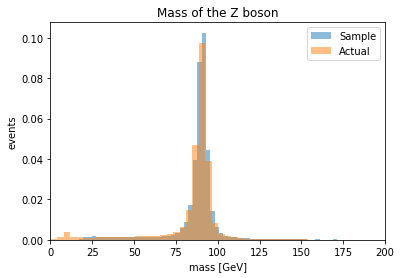

In [96]:
fig, ax = plt.subplots(1, 1)
ax.hist(IM,400,label = 'Sample',density = True, alpha=0.5)
ax.hist(IM2,600,label = 'Actual',density = True, alpha=0.5)
plt.title("Mass of the Z boson")
plt.xlabel('mass [GeV]')
plt.ylabel('events')
plt.xlim(0,200)
plt.legend()
plt.show()

From what I see in the histogram, the sample data is a very good simulation of the actual data. 